In [59]:
import json
import re
import numpy as np
import scipy
import pandas as pd
from bs4 import BeautifulSoup
from datetime import date, timedelta
import matplotlib
import matplotlib.pyplot as plt

In [5]:
target_mentions = [
("Kai Havertz",  118),
("Timo Werner", 136),
("Ben Chilwell", 106),
("Hakim Ziyech", 101),
("Édouard Mendy", 30),
("Thiago Silva", 69),
("Sergio Reguilon", 5),
("Jadon Sancho", 66),
("Moussa Dembele", 0),
("Jan Oblak", 15),
("Kalidou Koulibaly", 22),
("Raphael Varane", 0),
("Nicolas Tagliafico", 0),
("Declan Rice", 67),
("Dean Henderson", 25)
]
target_mentions.sort(key=lambda t:t[1], reverse=True)
target_mentions

[('Timo Werner', 136),
 ('Kai Havertz', 118),
 ('Ben Chilwell', 106),
 ('Hakim Ziyech', 101),
 ('Thiago Silva', 69),
 ('Declan Rice', 67),
 ('Jadon Sancho', 66),
 ('Édouard Mendy', 30),
 ('Dean Henderson', 25),
 ('Kalidou Koulibaly', 22),
 ('Jan Oblak', 15),
 ('Sergio Reguilon', 5),
 ('Moussa Dembele', 0),
 ('Raphael Varane', 0),
 ('Nicolas Tagliafico', 0)]

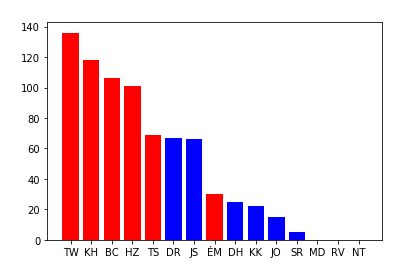

In [25]:
series = list(zip(*target_mentions))
names = series[0]
initials = [ name.split()[0][0] + name.split()[1][0] for name in names ]
mentions = series[1]
colors = ['r', 'r', 'r', 'r', 'r', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b']
plt.bar(initials, mentions, color=colors)

plt.title('Chelsea Acquisitions Compared to Other Plausible Targets', color="white")
plt.xlabel('Red = Actual Chelsea Acquisition', color="white")
plt.ylabel('Mentions in The Guardian', color="white")

plt.show()

In [6]:
targets_corrected = [('Ben Chilwell', 48, 'England', False),
 ('Timo Werner', 10, 'Germany', True),
 ('Thiago Silva', 10, 'Brazil', True),
 ('Édouard Mendy', 6, '', False),
 ('Kai Havertz', 0, 'Germany', True),
 ('Hakim Ziyech', 0, 'Netherlands', True)]

In [65]:
most_mentions_all_footballers = [('Timo Werner', 136, 'Germany', True),
 ('Kai Havertz', 118, 'Germany', True),
 ('Ben Chilwell', 106, 'England', False),
 ('Hakim Ziyech', 101, 'Netherlands', True),
 ('Marcus Rashford', 94, 'England', True),
 ('Jorginho', 88, 'Italy', False),
 ('Willian', 88, 'Brazil', False),
 ('Mason Mount', 80, 'England', False),
 ('Christian Pulisic', 77, 'USA', False),
 ('Harry Kane', 72, 'England', True),
 ('Tammy Abraham', 71, 'England', False),
 ('Thiago Silva', 69, 'Brazil', True),
 ('Olivier Giroud', 69, 'France', False),
 ('Jadon Sancho', 66, 'England', False),
 ('Harry Maguire', 66, 'England', False),
 ('Mason Greenwood', 65, '', False),
 ('Bruno Fernandes', 64, 'Portugal', True),
 ('Raheem Sterling', 62, 'England', True),
 ('Pierre-Emerick Aubameyang', 62, 'Gabon', True),
 ('Jordan Henderson', 59, 'England', True),
 ('Jamie Vardy', 59, 'England', True),
 ('Paul Pogba', 57, 'France ', False),
 ('Lionel Messi', 55, 'Argentina', False),
 ('Rodri', 54, 'Spain', False),
 ('Jack Grealish', 53, 'England', False),
 ('Marcelo', 53, 'Brazil', False),
 ('Virgil van Dijk', 50, 'Netherlands', True),
 ('Kevin De Bruyne', 48, 'Belgium', True),
 ('David Luiz', 47, 'Brazil', False),
 ('Sadio Mané', 43, 'Senegal', True),
 ('Alisson', 43, 'Brazil', True),
 ('Allan', 43, 'Brazil', False),
 ('Trent Alexander-Arnold', 42, 'England', True),
 ('Gareth Bale', 42, 'Wales', False),
 ('Anthony Martial', 39, 'France', False),
 ('James Maddison', 39, 'England', False),
 ('Fabinho', 38, 'Brazil', True),
 ('Kepa Arrizabalaga ', 38, 'Spain', False),
 ('Wilfried Zaha', 38, 'Ivory Coast', False),
 ('Thiago Alcântara', 37, 'Spain', True),
 ('Bukayo Saka', 37, '', False),
 ('César Azpilicueta', 37, 'Spain', False),
 ('Son Heung-min', 36, 'South Korea', True),
 ('Thomas Partey', 36, 'Ghana', True),
 ('Phil Foden', 36, '', False),
 ('Cristiano Ronaldo', 35, 'Portugal', False),
 ('Dele Alli', 35, 'England', False),
 ('Marcos Alonso', 35, 'Spain', False),
 ('Mohamed Salah', 34, 'Egypt', True),
 ('Danny Ings', 33, '', False),
 ('Diogo Jota', 32, 'Portugal', True),
 ('Mateo Kovacic', 32, 'Croatia', False),
 ('Kyle Walker', 32, 'England', False),
 ('Gabriel Jesus', 31, 'Brazil', False),
 ('Édouard Mendy', 30, '', False),
 ('Neymar', 28, 'Brazil', False),
 ('Roberto Firmino', 28, 'Brazil', True),
 ('Sergio Agüero', 28, 'Argentina', True),
 ('Richarlison', 28, 'Brazil', True),
 ('Donny van de Beek', 28, 'Netherlands', False),
 ('Alexandre Lacazette', 28, 'France', False),
 ('Jordan Pickford', 28, 'England', False),
 ('Luis Suárez', 27, 'Uruguay', False),
 ('James Rodríguez', 27, '', False),
 ('David Silva', 27, 'Spain', False),
 ('Dominic Calvert-Lewin', 26, 'England', True),
 ('Arthur', 26, 'Brazil', False),
 ('Michail Antonio', 26, '', False),
 ('Raúl Jiménez', 25, 'Mexico', True),
 ('Adama Traoré', 25, 'Spain', False),
 ('Nemanja Matic', 25, 'Serbia', False),
 ('Leroy Sané', 24, 'Germany', False),
 ('Eden Hazard', 24, 'Belgium', False),
 ('Aymeric Laporte', 24, 'France', False),
 ('Sergio Reguilón', 24, '', False),
 ('Riyad Mahrez', 23, 'Algeria', True),
 ('Alex Telles', 23, '', False),
 ('Dani Ceballos', 23, 'Spain', False),
 ('Kalidou Koulibaly', 22, 'Senegal', False),
 ('Ricardo Pereira', 22, 'Portugal', False),
 ('Robert Lewandowski', 21, 'Poland', False),
 ('Bernardo Silva', 21, 'Portugal', True),
 ('Ederson', 21, 'Brazil', True),
 ('Kieran Tierney', 21, '', False),
 ('Wayne Rooney', 21, 'England', False),
 ('Kylian Mbappé', 20, 'France', False),
 ('James Milner', 20, 'England', False),
 ('Thomas Müller', 19, 'Germany', False),
 ('Houssem Aouar', 19, 'France', False),
 ('Hugo Lloris', 19, 'France', False),
 ('Kasper Schmeichel', 19, 'Denmark', False),
 ('Lucas Moura', 19, 'Brazil', False),
 ('Lucas Torreira', 19, 'Uruguay', False),
 ('Edinson Cavani', 18, 'Uruguay', False),
 ('Tanguy Ndombele', 18, 'France', False),
 ('Romelu Lukaku', 17, 'Belgium', False),
 ('Fernandinho', 17, 'Brazil', False),
 ('Youri Tielemans', 17, 'Belgium', False),
 ('Divock Origi', 17, 'Belgium', False),
 ('John Stones', 17, 'England ', False),
 ('Georginio Wijnaldum', 16, 'Netherlands', True),
 ('Chris Smalling', 16, '', False),
 ('Aaron Wan-Bissaka', 16, 'England', False),
 ('Jan Oblak', 15, 'Slovenia', False),
 ('Conor Coady', 15, '', False),
 ('Ousmane Dembélé', 15, 'France', False),
 ('Takumi Minamino', 15, 'Japan', False),
 ('Serge Gnabry', 13, 'Germany', False),
 ('Giovani Lo Celso', 13, '', False),
 ('Timothy Castagne', 13, '', False),
 ('Sergio Ramos', 12, 'Spain', False),
 ('Zlatan Ibrahimovic', 12, 'Sweden', False),
 ('Nicolás Tagliafico', 12, 'Argentina', False),
 ('Alex Oxlade-Chamberlain', 12, 'England', False),
 ('Joël Matip', 12, 'Cameroon', False),
 ('Sébastien Haller', 12, 'France', False),
 ('Victor Lindelöf', 12, 'Sweden', False),
 ('Vincent Kompany', 12, 'Belgium', False),
 ('Joshua Kimmich', 11, 'Germany', False),
 ('Manuel Neuer', 11, 'Germany', False),
 ('David Alaba', 11, 'Austria', False),
 ('Kingsley Coman', 11, 'France', False),
 ('Ferran Torres ', 11, 'Spain', True),
 ('Rúben Dias', 11, 'Portugal', False),
 ('Kalvin Phillips', 11, '', False),
 ('Moussa Sissoko', 11, 'France', False),
 ('Teemu Pukki', 11, 'Finland', False),
 ('Alphonso Davies', 10, 'Canada', False),
 ('Memphis Depay', 10, 'France', False),
 ('Philippe Coutinho', 10, 'Brazil', False),
 ('Pierre-Emile Højbjerg', 10, '', False),
 ('Alexis Sánchez', 10, 'Chile', False),
 ('Naby Keïta', 10, 'Guinea', False),
 ('Nicolas Pépé', 10, 'Ivory Coast', False),
 ('Toby Alderweireld', 10, 'Belgium', False),
 ('Antoine Griezmann', 9, 'France', False),
 ('Diego Carlos', 9, '', False),
 ('Ilkay Gündogan', 9, 'Germany', False),
 ('Kieran Trippier', 9, 'England', False),
 ('Aaron Ramsey', 9, 'Wales', False),
 ('Odion Ighalo', 9, 'Nigeria', False),
 ('Steven Alzate', 9, 'Colombia', False),
 ('Karim Benzema', 8, 'France', False),
 ('Paulo Dybala', 8, 'Argentina', False),
 ('Frenkie de Jong', 8, 'Netherlands', False),
 ('Sergio Busquets', 8, 'Spain', False),
 ('Jan Vertonghen', 8, 'Belgium', False),
 ('Douglas Costa', 8, 'Brazil', False),
 ('Ciro Immobile', 7, 'Italy', False),
 ('Dayot Upamecano', 7, 'France', False),
 ('Santi Cazorla', 7, 'Spain', False),
 ('Carlos Tevez', 7, '', False),
 ('Diego Costa', 7, 'Spain', False),
 ('Ivan Perisic', 7, 'Croatia', False),
 ('Gonzalo Higuaín', 7, 'Argentina', False),
 ('Andrew Robertson', 6, 'Scotland', True),
 ('Marcel Sabitzer', 6, 'Austria', False),
 ('Luka Modric', 6, 'Croatia', False),
 ('Dries Mertens', 6, 'Belgium', False),
 ('Miralem Pjanic', 6, 'Bosnia-Herzegovina', False),
 ('Gerard Piqué', 6, 'Spain', False),
 ('Arturo Vidal', 6, 'Chile', False),
 ('Christian Eriksen', 6, 'Denmark', False),
 ('Ivan Rakitic ', 6, 'Croatia', False),
 ('Patrick Bamford', 6, '', False),
 ('Rúben Neves', 6, 'Portugal', False),
 ('Leon Goretzka', 5, 'Germany', False),
 ('Lautaro Martínez ', 5, 'Argentina', False),
 ('Achraf Hakimi', 5, 'Morocco', False),
 ('Álvaro Morata', 5, 'Spain', False),
 ('Jérôme Boateng', 5, 'Germany', False),
 ('Giorgio Chiellini', 5, 'Italy', False),
 ('Edin Dzeko', 5, 'Bosnia-Herzegovina', False),
 ('Moussa Dembélé', 5, 'France', False),
 ('Benjamin Pavard', 5, 'France', False),
 ('Marcelo Brozovic', 5, 'Croatia', False),
 ('Oleksandr Zinchenko', 5, 'Ukraine', False),
 ('Erling Braut Haaland', 4, 'Norway', False),
 ('Toni Kroos', 4, 'Germany', False),
 ('Ansu Fati', 4, 'Spain', False),
 ("N'Golo Kanté", 4, 'France', True),
 ('Casemiro', 4, 'Brazil', False),
 ('Luis Alberto', 4, 'Spain', False),
 ('Angeliño', 4, '', False),
 ('Jordi Alba', 4, 'Spain', False),
 ('Lorenzo Insigne', 4, 'Italy', False),
 ('Henrikh Mkhitaryan', 4, '', False),
 ('João Cancelo', 4, 'Portugal', False),
 ('Milan Skriniar ', 4, 'Slovakia', False),
 ('Aleksandar Kolarov', 4, 'Serbia', False),
 ('João Moutinho', 4, 'Portugal', False),
 ('Milot Rashica', 4, 'Kosovo', False),
 ('Nacho', 4, 'Spain', False),
 ('Niklas Süle', 4, 'Germany', False),
 ('Marquinhos', 3, 'Brazil', False),
 ('Lucas Ocampos', 3, 'Argentina', False),
 ('Josip Ilicic', 3, 'Slovenia', False),
 ('Matthijs de Ligt', 3, 'Netherlands', False),
 ('Robin Gosens', 3, 'Germany', False),
 ('David De Gea', 3, 'Spain', False),
 ('Saúl Ñíguez', 3, 'Spain', False),
 ('Luuk de Jong', 3, '', False),
 ('Iago Aspas', 3, 'Spain', False),
 ('Victor Osimhen', 3, 'Nigeria', False),
 ('Luis Muriel', 3, '', False),
 ('Gio Reyna', 3, '', False),
 ('Alexander Sørloth', 3, '', False),
 ('Daley Blind', 3, 'Netherlands', False),
 ('Dani Alves', 3, 'Brazil', False),
 ('Dani Olmo', 3, 'Spain', False),
 ('Mikel Merino', 3, '', False),
 ('Blaise Matuidi', 3, 'France', False),
 ('Florian Thauvin', 3, 'France', False),
 ('Idrissa Gueye', 3, 'Senegal', False),
 ('Mattéo Guendouzi', 3, 'France', False),
 ('Mike Maignan', 3, 'France', False),
 ('Nicolò Zaniolo', 3, 'Italy', False),
 ('Samuel Umtiti', 3, 'France', False),
 ('Thomas Meunier', 3, 'Belgium', False),
 ('João Félix', 2, 'Portugal', False),
 ('Thibaut Courtois', 2, 'Belgium', False),
 ('Keylor Navas', 2, 'Costa Rica', False),
 ('Martin Ødegaard', 2, 'Norway', False),
 ('Jesús Navas', 2, 'Spain', False),
 ('Eduardo Camavinga', 2, 'France', False),
 ('Dominik Szoboszlai', 2, 'Hungary', False),
 ('Gerard Moreno', 2, '', False),
 ('Jules Koundé', 2, '', False),
 ('Federico Chiesa', 2, 'Italy', False),
 ('Juan Cuadrado', 2, '', False),
 ('Dusan Tadic', 2, 'Serbia', False),
 ('Renan Lodi', 2, '', False),
 ('Sven Bender', 2, '', False),
 ('Jesús Corona', 2, '', False),
 ('Steven Berghuis', 2, '', False),
 ('Anthony Lopes', 2, '', False),
 ('Francesco Caputo', 2, '', False),
 ('Christopher Nkunku', 2, '', False),
 ('Bruno Guimarães', 2, '', False),
 ('Alessandro Bastoni', 2, '', False),
 ('Dani Parejo', 2, 'Spain', False),
 ('Gianluigi Buffon', 2, 'Italy', False),
 ('Hirving Lozano', 2, 'Mexico', False),
 ('Isco', 2, 'Spain', False),
 ('Jens Petter Hauge', 2, '', False),
 ('Joaquín Correa', 2, '', False),
 ('Juan Bernat', 2, '', False),
 ('Yannick Carrasco', 2, '', False),
 ('Yassine Bounou', 2, '', False),
 ('Youssef En-Nesyri', 2, '', False),
 ('Clément Lenglet', 2, 'France', False),
 ('Dani Carvajal', 2, 'Spain', False),
 ('Danilo Pereira', 2, 'Portugal', False),
 ('David Villa', 2, 'Spain', False),
 ('Eran Zahavi', 2, 'Israel', False),
 ('Federico Bernardeschi', 2, 'Italy', False),
 ('Kevin Volland', 2, 'Germany', False),
 ('Luka Jovic', 2, 'Serbia', False),
 ('Mario Mandzukic', 2, 'Croatia', False),
 ('Stefano Sensi', 2, 'Italy', False),
 ('Marc-André ter Stegen', 1, 'Germany', False),
 ('Duván Zapata', 1, 'Colombia', False),
 ('Federico Valverde', 1, 'Uruguay', False),
 ('Éver Banega', 1, 'Argentina', False),
 ('Presnel Kimpembe', 1, 'France', False),
 ('Wissam Ben Yedder', 1, 'France', False),
 ('Koke', 1, 'Spain', False),
 ('Stefan de Vrij', 1, 'Netherlands', False),
 ('Dejan Kulusevski', 1, '', False),
 ('Sergej Milinkovic-Savic', 1, 'Serbia', False),
 ('Marco Verratti', 1, 'Italy', False),
 ('Marcus Thuram', 1, 'France', False),
 ('Francesco Acerbi', 1, '', False),
 ('Raphaël Guerreiro', 1, '', False),
 ('Pedri', 1, '', False),
 ('Jason Denayer', 1, '', False),
 ('Maxence Caqueret', 1, '', False),
 ('Patson Daka', 1, '', False),
 ('Artem Dzyuba', 1, 'Russia', False),
 ('Ferland Mendy', 1, '', False),
 ('Mauro Icardi', 1, 'Argentina', False),
 ('Sardar Azmoun', 1, '', False),
 ('Carlos Vela', 1, 'Mexico', False),
 ('Adrien Rabiot', 1, '', False),
 ('Edmond Tapsoba', 1, '', False),
 ('Jonathan Ikoné', 1, '', False),
 ('Leandro Paredes', 1, 'Argentina', False),
 ('Marco Reus', 1, 'Germany', False),
 ('Marten de Roon', 1, '', False),
 ('Samir Handanovic', 1, 'Slovenia', False),
 ('Simon Kjaer', 1, '', False),
 ('Vedat Muriqi', 1, 'Kosovo', False),
 ('Aleksey Miranchuk', 1, 'Russia', False),
 ('Alex Sandro', 1, 'Brazil', False),
 ('Darío Benedetto ', 1, 'Argentina', False),
 ('Exequiel Palacios', 1, 'Argentina', False),
 ('Fernando Llorente', 1, 'Spain', False),
 ('Joan Jordán', 1, 'Spain', False),
 ('Joaquin', 1, 'Spain', False),
 ('Julian Brandt', 1, 'Germany', False),
 ('Krzysztof Piatek', 1, 'Poland', False),
 ('Quincy Promes', 1, 'Netherlands', False),
 ('Salomón Rondón', 1, 'Venezuela', False),
 ('Steve Mandanda', 1, 'France', False),
 ('Thorgan Hazard', 1, 'Belgium', False),
 ('Wahbi Khazri', 1, 'Tunisia', False),
 ('Alejandro ‘Papu’ Gomez', 0, 'Argentina', False),
 ('Angel Di María', 0, 'Argentina', False),
 ('Marcos Llorente', 0, 'Spain', False),
 ('Nicoló Barella', 0, 'Italy', False),
 ('Gabriel Barbosa', 0, 'Brazil', False),
 ('Raphaël Varane', 0, 'France', False),
 ('Mikel Oyarzabal', 0, 'Spain', False),
 ('Bruno Henrique', 0, 'Brazil', False),
 ('Giorgian De Arrascaeta ', 0, 'Uruguay', False),
 ('Éverton Ribeiro', 0, 'Brazil', False),
 ('Theo Hernandez', 0, '', False),
 ('Fábian Ruiz', 0, 'Spain', False),
 ('Gianluigi Donnarumma', 0, 'Italy', False),
 ('Sergio Canales', 0, 'Spain', False),
 ('Franck Kessié', 0, '', False),
 ('Leonardo Bonucci', 0, 'Italy', False),
 ('Ángel Correa', 0, '', False),
 ('Nikola Vlašić', 0, '', False),
 ('Vinicius Junior', 0, 'Brazil', False),
 ('André Onana', 0, 'Cameroon', False),
 ('Alassane Pléa', 0, 'France', False),
 ('Abderrazak Hamdallah', 0, '', False),
 ('Andrej Kramarić', 0, '', False),
 ('Darwin Nuñez', 0, '', False),
 ('Maxi Gómez', 0, 'Uruguay', False),
 ('Mats Hummels', 0, 'Germany', False),
 ('Renato Sanches', 0, '', False),
 ('Andres Iniesta', 0, '', False),
 ('Ismaël Bennacer ', 0, 'Algeria', False),
 ('Ignacio Fernández', 0, 'Argentina', False),
 ('Diego Rossi', 0, '', False),
 ('Enzo Pérez', 0, 'Argentina', False),
 ('Domenico Berardi', 0, '', False),
 ('Rodrygo', 0, 'Brazil', False),
 ('Moisés Caicedo', 0, '', False),
 ('André-Pierre Gignac', 0, 'France', False),
 ('Anton Miranchuk', 0, '', False),
 ('Everton Soares', 0, '', False),
 ('Matheus Cunha', 0, '', False),
 ('Wojciech Szczesny', 0, 'Poland', False),
 ('Achraf Bencharki', 0, '', False),
 ('Akram Afif', 0, 'Qatar', False),
 ('Alvaro Gonzalez', 0, '', False),
 ('Baghdad Bounedjah', 0, '', False),
 ('Edin Visca', 0, '', False),
 ('Enock Mwepu', 0, '', False),
 ('Erick Pulgar', 0, '', False),
 ('Florian Neuhaus', 0, '', False),
 ('Fredrik Midtsjo', 0, '', False),
 ('Germán Pezzella', 0, '', False),
 ('Gerson', 0, 'Brazil', False),
 ('Gianluca Lapadula', 0, '', False),
 ('Hakan Çalhanoğlu', 0, '', False),
 ('Héctor Herrera', 0, 'Mexico', False),
 ('Igor Stasevich', 0, '', False),
 ('Iñaki Williams', 0, 'Spain', False),
 ('Jackson Muleka', 0, '', False),
 ('Jonathan Rodriguez', 0, '', False),
 ('Jordan Larsson', 0, '', False),
 ('José María Giménez', 0, 'Uruguay', False),
 ('Kaoru Mitoma', 0, '', False),
 ('Kodjo Fo-Doh Laba', 0, '', False),
 ('Koen Casteels', 0, '', False),
 ('Luis Montes', 0, '', False),
 ('Lukáš Hrádecký', 0, '', False),
 ('Manuel Locatelli', 0, '', False),
 ('Marcos Senesi', 0, '', False),
 ('Marinho (Santos)', 0, '', False),
 ('Mathieu Valbuena', 0, '', False),
 ('Nicolás De La Cruz', 0, 'Uruguay', False),
 ('Paco Alcácer', 0, 'Spain', False),
 ('Pepê (Gremio)', 0, '', False),
 ('Péter Gulácsi', 0, '', False),
 ('Rafael Santos Borré', 0, 'Colombia', False),
 ('Rayan Aït-Nouri', 0, '', False),
 ('Reinaldo', 0, '', False),
 ('Rodrigo Moreno', 0, 'Spain', False),
 ('Safawi Rasid', 0, '', False),
 ('Steven Nzonzi', 0, '', False),
 ('Walter Kannemann', 0, '', False),
 ('Wilmar Barrios', 0, '', False),
 ('Yann Sommer', 0, 'Switzerland', False),
 ('Yeferson Soteldo', 0, '', False),
 ('Zeki Çelik', 0, '', False),
 ('Almoez Ali', 0, 'Qatar', False),
 ('Ante Rebić', 0, 'Croatia', False),
 ('Axel Witsel', 0, 'Belgium', False),
 ('Bafetimbi Gomis', 0, 'France', False),
 ('Brendan Gan', 0, 'Malaysia', False),
 ('Bruno Petkovic', 0, 'Croatia', False),
 ('Çaglar Söyüncü', 0, 'Turkey', False),
 ('David Neres', 0, 'Brazil', False),
 ('Diego Godín', 0, 'Uruguay', False),
 ('Djené Dakonam', 0, 'Togo', False),
 ('Dudu', 0, 'Brazil', False),
 ('Edison Flores', 0, 'Peru', False),
 ('Esteban Andrada', 0, 'Argentina', False),
 ('Fabio Quagliarella', 0, 'Italy', False),
 ('Fernando Muslera', 0, 'Uruguay', False),
 ('Franco Armani', 0, 'Argentina', False),
 ('Germán Cano', 0, 'Argentina', False),
 ('Gonçalo Guedes', 0, 'Portugal', False),
 ('Iker Muniain', 0, 'Spain', False),
 ('João Silva', 0, 'Portugal', False),
 ('José Juan Macías ', 0, 'Mexico', False),
 ('Josef Martínez', 0, 'Venezuela', False),
 ('Juan Fernando Quintero', 0, 'Colombia', False),
 ('Kaan Ayhan', 0, 'Turkey', False),
 ('Lucas Hernández', 0, 'France', False),
 ('Luis Abram', 0, 'Peru', False),
 ('Malcom', 0, 'Brazil', False),
 ('Marcelo Díaz', 0, 'Chile', False),
 ('Marco Asensio', 0, 'Spain', False),
 ('Martin Hinteregger ', 0, 'Austria', False),
 ('Matías Vecino', 0, 'Uruguay', False),
 ('Nabil Fékir', 0, 'France', False),
 ('Nguyễn Quang Hải', 0, 'Vietnam', False),
 ('Nicolás Lodeiro', 0, 'Uruguay', False),
 ('Pablo Sarabia', 0, 'Spain', False),
 ('Paolo Guerrero', 0, 'Peru', False),
 ('Radja Nainggolan', 0, 'Belgium', False),
 ('Raúl Ruidíaz', 0, 'Croatia', False),
 ('Rodrigo Bentancur', 0, 'Uruguay', False),
 ('Salvatore Sirigu', 0, 'Italy', False),
 ('Sofiane Feghouli', 0, 'Algeria', False),
 ('Sunil Chhetri', 0, 'India', False),
 ('Taras Stepanenko', 0, 'Ukraine', False),
 ('Vieirinha', 0, 'Portugal', False),
 ('William Carvalho', 0, 'Portugal', False),
 ('Yoshimar Yotún', 0, 'Peru', False),
 ('Youcef Atal', 0, 'Algeria', False),
 ('Yunis Abdelhamid', 0, 'Morocco', False),
 ('Zelimkhan Bakayev', 0, 'Russia', False)]

In [53]:
 colors = ['r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b']


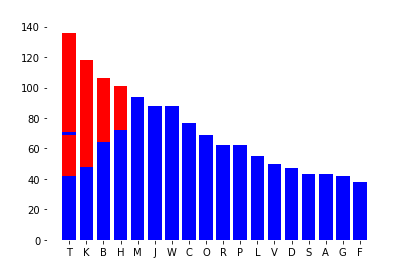

In [74]:
series = list(zip(*most_mentions_all_footballers))
names = series[0][:40]
mentions = series[1][:40]

initials = [ name.split()[0][0] for name in names ]

plt.bar(initials, mentions, color=colors)

plt.title('Chelsea Acquisitions Compared to Prominent World Footballers', color="white")
plt.xlabel('Red = Actual Chelsea Acquisition', color="white")
plt.ylabel('Mentions in The Guardian', color="white")

plt.show()

In [43]:
targets_corrected = [('Timo Werner', 136, 10),
 ('Kai Havertz', 118, 0),
 ('Ben Chilwell', 106, 48),
 ('Hakim Ziyech', 101, 0),
 ('Thiago Silva', 69, 10),
 ('Édouard Mendy', 30, 6),
]

In [47]:
series = list(zip(*targets_corrected))
names = series[0]
initials = [ name.split()[0][0] + name.split()[1][0] for name in names ]
initials_array = np.array(initials)
prior_mentions = series[1]
corrected_mentions = series[2]

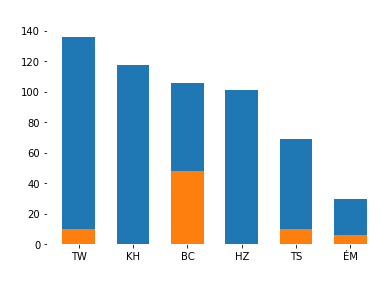

In [63]:
width = 0.6
matplotlib.rc('axes',edgecolor='white')
plt.bar(x=initials_array, height=prior_mentions, width=width)
plt.bar(x=initials_array, height=corrected_mentions, width=width)
plt.title('Corrected mentions', fontsize=18, color="white")
plt.xlabel('Blue = All Mentions in the Dataset\nYellow = Mentions Adjusted for Acquisition Date', color="white")
plt.ylabel('Mentions in The Guardian', color="white")
plt.show()